In [1]:
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

In [2]:
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

--2024-04-02 07:03:52--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   234MB/s    in 0.4s    

2024-04-02 07:03:53 (234 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1
    

In [3]:
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
!python -m pip install pandas
!rm $MINICONDA_INSTALLER_SCRIPT
import sys

  Cloning https://github.com/ersilia-os/ersilia.git to /tmp/pip-req-build-_cqn5vxy
  Running command git clone -q https://github.com/ersilia-os/ersilia.git /tmp/pip-req-build-_cqn5vxy
  Resolved https://github.com/ersilia-os/ersilia.git to commit 5768ce15b1dde50acf323ecc1ef20554bb9084ff
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 139 kB 7.8 MB/s 
     |████████████████████████████████| 4.3 MB 51.2 MB/s 
     |████████████████████████████████| 148 kB 51.5 MB/s 
     |████████████████████████████████| 58 kB 6.2 MB/s 
     |████████████████████████████████| 9.9 MB 69.2 MB/s 
     |████████████████████████████████| 670 kB 42.1 MB/s 
     |████████████████████████████████| 78 kB 6.9 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 97 kB 8.2 MB/s 
     |████████████████████████████████| 433 kB 60.7 MB/s 
     |█████████

In [4]:
pip install rdkit

     |████████████████████████████████| 29.5 MB 1.4 MB/s 
     |████████████████████████████████| 3.4 MB 57.5 MB/s 


In [5]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [6]:
import sys

In [7]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [8]:
## Mounting google drive
from google.colab import drive

In [9]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# specifying my input folder

input_folder = "/content/drive/MyDrive/Ersilia"

In [11]:
# specifying my output folder

output_folder = "/content/drive/MyDrive/Ersilia"

Downloading the eos6oli model from Ersilia

In [12]:
model_name = "eos6oli"

Fetching the model

In [13]:
# Fetching the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
  Running command git clone -q https://github.com/ersilia-os/bentoml-ersilia.git /tmp/pip-req-build-6ozjnqf8
Solving environment: | / failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/eosbase-bentoml-0.11.0-py37

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2024.3

Serving the model

In [14]:
# Serving the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:35349
   PID: 18502
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


# Checking for data leakage

Reading in the actual training dataset used by authors

In [15]:
# specify the name of my input csv file

input_filename = "aqsol"

In [16]:
# specify the SMILES column name
smiles_column = "smiles"

In [17]:
# Extracting SMILES to a list
import pandas as pd

In [18]:
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df1 = pd.read_csv(path)
training_smiles = df1[smi_col].tolist()

print("The training dataset contains" + " " + str(len(training_smiles)) + " " + "SMILES")

The training dataset contains 9982 SMILES


Reading in the external dataset with sufficient experimental results

In [19]:
# specify the name of my input csv file

input_filename = "aqua_stand"

In [20]:
# specify the SMILES column name
smiles_column = "smiles"

In [21]:
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
external_smiles = df[smi_col].tolist()

print("The external dataset contains" + " " + str(len(external_smiles)) + " " + "SMILES")

The external dataset contains 1310 SMILES


In [22]:
df

,smiles,logS,weight
0,BrC(Br)(Br)Br,-3.14,1.0
1,BrC(Br)Br,-1.91,1.0
2,BrC1CCCCC1,-2.30,1.0
3,BrC=CBr,-1.32,1.0
4,BrCBr,-1.17,1.0
...,...,...,...
1305,c1ccoc1,-0.82,1.0
1306,c1ccsc1,-1.45,1.0
1307,c1cnc2c(c1)ccc1ncccc12,-2.68,1.0
1308,c1cnc2ncncc2n1,0.02,1.0


Comparing the training and external dataset to be sure there is no data leakage

In [23]:
def check_for_leaks(external_smiles, training_smiles):
    leaks = []
    for smile in external_smiles:
        if smile in training_smiles:
            print(f"The molecule {smile} is a leak.")
            leaks.append(smile)
    return leaks

leak_items = check_for_leaks(external_smiles, training_smiles)
total_leaks_before_cleaning = len(leak_items)
print(f"Total number of leaks found: {total_leaks_before_cleaning}")

if not leak_items:
    print("No leaks found.")

The molecule BrC(Br)(Br)Br is a leak.
The molecule BrC(Br)Br is a leak.
The molecule BrC1CCCCC1 is a leak.
The molecule BrC=CBr is a leak.
The molecule BrCBr is a leak.
The molecule BrCCBr is a leak.
The molecule BrCCCBr is a leak.
The molecule Brc1ccc(Br)c(Br)c1 is a leak.
The molecule Brc1ccc(Br)cc1 is a leak.
The molecule Brc1ccc2ccccc2c1 is a leak.
The molecule Brc1cccc(Br)c1 is a leak.
The molecule Brc1cccc(Br)c1Br is a leak.
The molecule Brc1cccc2ccccc12 is a leak.
The molecule Brc1ccccc1 is a leak.
The molecule Brc1ccccc1Br is a leak.
The molecule C1CCCC1 is a leak.
The molecule C1CCCCC1 is a leak.
The molecule C1CCCCCC1 is a leak.
The molecule C1CCCCCCC1 is a leak.
The molecule C1CCNCC1 is a leak.
The molecule C1CCOCC1 is a leak.
The molecule C1CNCCN1 is a leak.
The molecule C1COCCN1 is a leak.
The molecule C=CC#N is a leak.
The molecule C=CC=C is a leak.
The molecule C=CC=O is a leak.
The molecule C=CCC1(CC=C)C(=O)NC(=O)NC1=O is a leak.
The molecule C=CCC=C is a leak.
The mole

Deleting the leaks

In [24]:

# Check if 'smiles' values in external_df is in the list of leak_items
mask = df['smiles'].isin(leak_items)

# Invert the mask to keep rows where the 'smiles' values is not a leak
noLeaks_df = df[~mask]


In [25]:
noLeaks_df

,smiles,logS,weight
15,C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1,-3.90,1.0
16,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C,-5.66,1.0
17,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.57,1.0
18,C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C,-4.30,1.0
19,C#CC1(OC(C)=O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.79,1.0
...,...,...,...
1303,c1ccncc1,0.76,1.0
1305,c1ccoc1,-0.82,1.0
1306,c1ccsc1,-1.45,1.0
1307,c1cnc2c(c1)ccc1ncccc12,-2.68,1.0


Cross checking to be sure there is no leak

In [26]:

noLeaks_smiles = noLeaks_df['smiles'].tolist()

print("The no_leaks dataset contains" + " " + str(len(noLeaks_smiles)) + " " + "SMILES")


leak_items = check_for_leaks(noLeaks_smiles, training_smiles)
total_leaks_after_cleaning = len(leak_items)
print(f"Total number of leaks found: {total_leaks_after_cleaning }")

if not leak_items:
    print("No leaks found.")

The no_leaks dataset contains 794 SMILES
Total number of leaks found: 0
No leaks found.


Summary Statistics

In [27]:
print("The training dataset contains" + " " + str(len(training_smiles)) + " " + "SMILES")
print("Before cleaning the external dataset contained" + " " + str(len(external_smiles)) + " " + "SMILES")
print(f"Total number of leaks found before cleaning: {total_leaks_before_cleaning }")
print("After cleaning the no_leaks dataset contains" + " " + str(len(noLeaks_smiles)) + " " + "SMILES")
print(f"Total number of leaks found after cleaning: {total_leaks_after_cleaning }")

The training dataset contains 9982 SMILES
Before cleaning the external dataset contained 1310 SMILES
Total number of leaks found before cleaning: 516
After cleaning the no_leaks dataset contains 794 SMILES
Total number of leaks found after cleaning: 0


Preprocessing: Checking if SMILES are in standard form

In [28]:
import rdkit
from rdkit import Chem

def is_smiles(smiles):
  try:
    mol=Chem.MolFromSmiles(smiles)
    if mol is None:
      return False
    return True
  except:
    return False

In [29]:
for i in noLeaks_df['smiles']:
  if is_smiles(i):
    print("Valid SMILES")
  else:
    print("Not a valid SMILES")

Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES

In [30]:
noLeaks_df

,smiles,logS,weight
15,C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1,-3.90,1.0
16,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C,-5.66,1.0
17,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.57,1.0
18,C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C,-4.30,1.0
19,C#CC1(OC(C)=O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.79,1.0
...,...,...,...
1303,c1ccncc1,0.76,1.0
1305,c1ccoc1,-0.82,1.0
1306,c1ccsc1,-1.45,1.0
1307,c1cnc2c(c1)ccc1ncccc12,-2.68,1.0


In [31]:
noLeaks_df.to_csv('/content/drive/MyDrive/Ersilia/noLeaks_data.csv', index=False)

Reading in the no-leaks dataset

In [32]:
# specify the name of my input csv file

input_filename = "noLeaks_data"

In [33]:
# specify the SMILES column name
smiles_column = "smiles"

In [34]:
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 794 SMILES


In [35]:

df

,smiles,logS,weight
0,C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1,-3.90,1.0
1,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C,-5.66,1.0
2,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.57,1.0
3,C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C,-4.30,1.0
4,C#CC1(OC(C)=O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.79,1.0
...,...,...,...
789,c1ccncc1,0.76,1.0
790,c1ccoc1,-0.82,1.0
791,c1ccsc1,-1.45,1.0
792,c1cnc2c(c1)ccc1ncccc12,-2.68,1.0


In [36]:
 #Running predictions
api = "calculate"

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 54.99 seconds


In [37]:
# Check the results
print(output.head())

                           key                                        input  \
0  BYYMILHAKOURNM-UHFFFAOYSA-N                C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1   
1  CHNXZKVNWQUJIB-UHFFFAOYSA-N     C#CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C   
2  VIKNJXKGJWUCNN-UHFFFAOYSA-N        C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C   
3  BFPYWIDHMRZLRN-UHFFFAOYSA-N          C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C   
4  IMONTRJLAWHYGT-UHFFFAOYSA-N  C#CC1(OC(C)=O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C   

   solubility  
0      -3.441  
1      -4.725  
2      -4.412  
3      -4.306  
4      -5.915  


In [38]:
#Save the results in Google Drive
output.to_csv("/content/drive/MyDrive/Ersilia/ErsiliaValidation.csv", index=False)

In [39]:

ErsiliaEvaluation=pd.read_csv("/content/drive/MyDrive/Ersilia/ErsiliaValidation.csv")
ErsiliaEvaluation.head()

,key,input,solubility
0,BYYMILHAKOURNM-UHFFFAOYSA-N,C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1,-3.441
1,CHNXZKVNWQUJIB-UHFFFAOYSA-N,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C,-4.725
2,VIKNJXKGJWUCNN-UHFFFAOYSA-N,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.412
3,BFPYWIDHMRZLRN-UHFFFAOYSA-N,C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C,-4.306
4,IMONTRJLAWHYGT-UHFFFAOYSA-N,C#CC1(OC(C)=O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-5.915


In [40]:
#matching outputs with smiles and returning the true solubility values
# Merging dataframes
merged_predictions = pd.merge(ErsiliaEvaluation, df[['smiles', 'logS']], how='left', left_on='input', right_on='smiles')

# Renaming and dropping redundant columns
merged_predictions = merged_predictions.rename(columns={'logS': 'experimental_solubility'})
merged_predictions = merged_predictions.rename(columns={'solubility': 'predicted_solubility'})
merged_predictions = merged_predictions.drop(columns='smiles', axis=1)

# Displaying the result
print(merged_predictions)

                             key                                        input  \
0    BYYMILHAKOURNM-UHFFFAOYSA-N                C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1   
1    CHNXZKVNWQUJIB-UHFFFAOYSA-N     C#CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C   
2    VIKNJXKGJWUCNN-UHFFFAOYSA-N        C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C   
3    BFPYWIDHMRZLRN-UHFFFAOYSA-N          C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C   
4    IMONTRJLAWHYGT-UHFFFAOYSA-N  C#CC1(OC(C)=O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C   
..                           ...                                          ...   
803  JUJWROOIHBZHMG-UHFFFAOYSA-N                                     c1ccncc1   
804  YLQBMQCUIZJEEH-UHFFFAOYSA-N                                      c1ccoc1   
805  YTPLMLYBLZKORZ-UHFFFAOYSA-N                                      c1ccsc1   
806  OZKOMUDCMCEDTM-UHFFFAOYSA-N                       c1cnc2c(c1)ccc1ncccc12   
807  CPNGPNLZQNNVQM-UHFFFAOYSA-N                               c1cnc2ncncc2n1   

     predicted_solubility  

In [41]:
merged_predictions.to_csv("/content/drive/MyDrive/Ersilia/merged_ErsiliaValidation.csv", index=False)

Calculating R2 Score to evaluate the performance

In [42]:
from sklearn.metrics import r2_score

r2 = r2_score(merged_predictions['experimental_solubility'], merged_predictions['predicted_solubility'])
print(f'R-squared (R2): {r2:.2f}')

R-squared (R2): 0.88


PCA of Morgan Fingerprints

/usr/local/lib/python3.10/dist-packages/rdkit/Chem/PandasTools.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)
<ipython-input-43-83c4a72051df>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_df['inchikey'] = validation_df['ROMol'].apply(Chem.MolToInchiKey)
<ipython-input-43-83c4a72051df>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

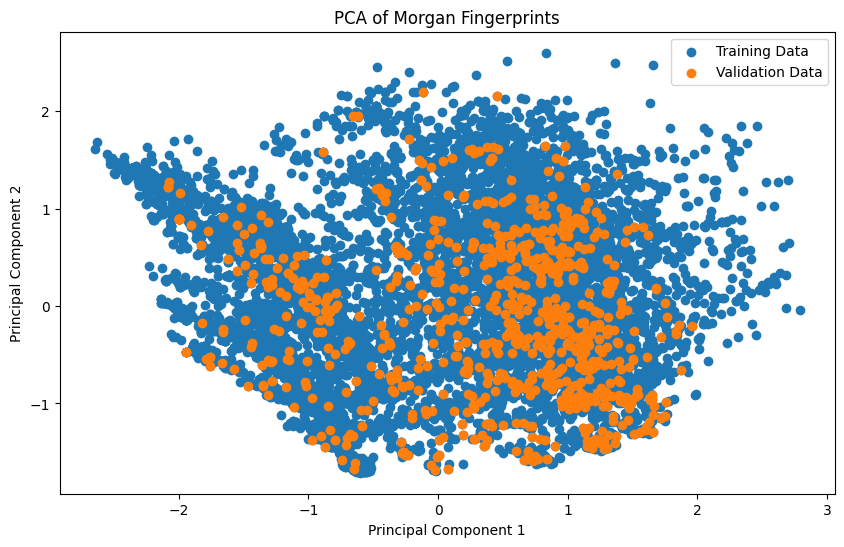

In [43]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Loading my training and validation dataframes
validation_df=noLeaks_df
training_df=df1

# Generating and saving InChIKeys in the dataframes
PandasTools.AddMoleculeColumnToFrame(training_df, smilesCol='smiles')
training_df['inchikey'] = training_df['ROMol'].apply(Chem.MolToInchiKey)

PandasTools.AddMoleculeColumnToFrame(validation_df, smilesCol='smiles')
validation_df['inchikey'] = validation_df['ROMol'].apply(Chem.MolToInchiKey)

# Generating Morgan fingerprints for both dataframes
radius = 2
n_bits = 2048

training_df['morgan_fp'] = training_df['ROMol'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, radius, nBits=n_bits))
validation_df['morgan_fp'] = validation_df['ROMol'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, radius, nBits=n_bits))

# Converting Morgan fingerprints to numpy arrays
training_fps = [list(training_df['morgan_fp'].iloc[i]) for i in range(len(training_df))]
validation_fps = [list(validation_df['morgan_fp'].iloc[i]) for i in range(len(validation_df))]

# Applying PCA
pca = PCA(n_components=2)
training_pca = pca.fit_transform(training_fps)
validation_pca = pca.transform(validation_fps)

# Plotting PCA
plt.figure(figsize=(10, 6))
plt.scatter(training_pca[:, 0], training_pca[:, 1], label='Training Data')
plt.scatter(validation_pca[:, 0], validation_pca[:, 1], label='Validation Data')
plt.title('PCA of Morgan Fingerprints')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.savefig('/content/drive/MyDrive/Ersilia/PCAMorganFingerprints_plot.png')
plt.show()


Calculating Tanimoto Similarity

In [44]:
from rdkit.Chem import AllChem, MolFromSmiles
from rdkit import DataStructs
import pandas as pd

# loading the training and validation dataframes
training_df = df1
validation_df = noLeaks_df

# Converting SMILES to RDKit molecules
training_mols = [MolFromSmiles(smiles) for smiles in training_df['smiles']]
validation_mols = [MolFromSmiles(smiles) for smiles in validation_df['smiles']]

# Generating fingerprints for training and validation sets
training_fps = [AllChem.GetMorganFingerprint(mol, 2) for mol in training_mols]
validation_fps = [AllChem.GetMorganFingerprint(mol, 2) for mol in validation_mols]

# Calculating Tanimoto similarity between training and validation sets
tanimoto_similarities = []
for train_fp in training_fps:
    for valid_fp in validation_fps:
        similarity = DataStructs.TanimotoSimilarity(train_fp, valid_fp)
        tanimoto_similarities.append(similarity)


# Calculating the average Tanimoto similarity
average_similarity = sum(tanimoto_similarities) / len(tanimoto_similarities)

# Output the average Tanimoto similarity
print(f"Average Tanimoto similarity between molecules in training and validation sets: {average_similarity:.4f}")





Average Tanimoto similarity between molecules in training and validation sets: 0.0850


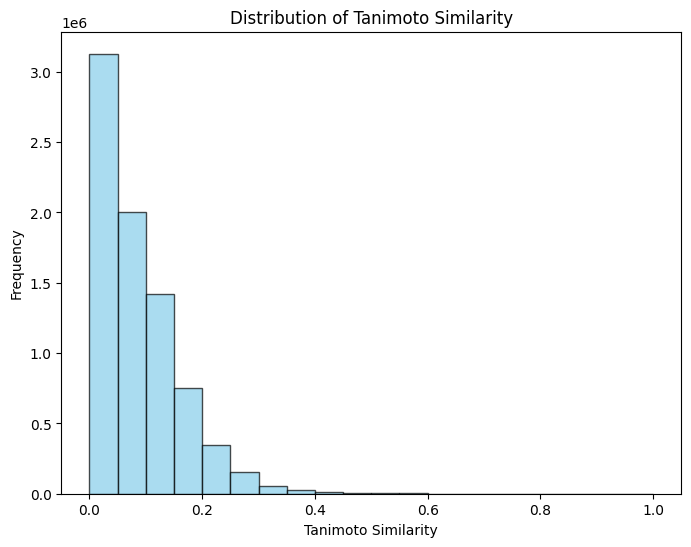

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshaping the list of similarities into a matrix
num_training = len(training_fps)
num_validation = len(validation_fps)
similarity_matrix = [tanimoto_similarities[i*num_validation:(i+1)*num_validation] for i in range(num_training)]

# Plotting the histogram of Tanimoto similarities
plt.figure(figsize=(8, 6))
plt.hist(tanimoto_similarities, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Tanimoto Similarity')
plt.xlabel('Tanimoto Similarity')
plt.ylabel('Frequency')
plt.grid(False)

plt.savefig('/content/drive/MyDrive/Ersilia/TanimotoSimilarity_plot.png')
plt.show()


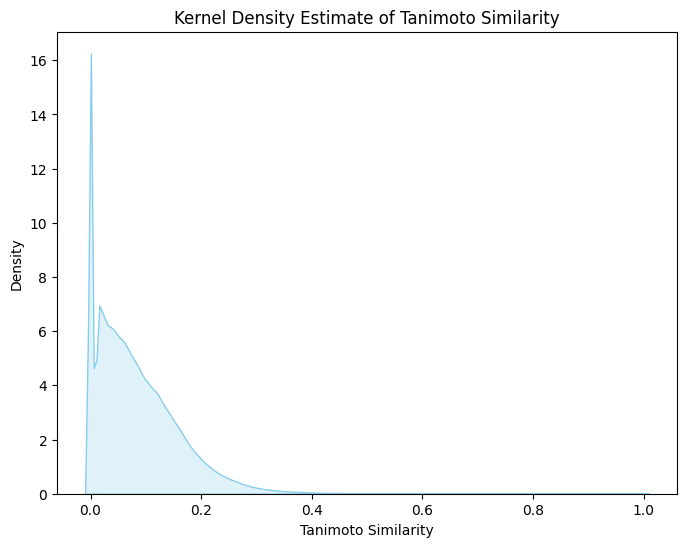

In [46]:
# Plotting the kernel density estimate of Tanimoto similarities
plt.figure(figsize=(8, 6))
sns.kdeplot(tanimoto_similarities, color='skyblue', fill=True)
plt.title('Kernel Density Estimate of Tanimoto Similarity')
plt.xlabel('Tanimoto Similarity')
plt.ylabel('Density')

plt.savefig('/content/drive/MyDrive/Ersilia/TanimotoSimilarity2_plot.png')
plt.show()
